# Ecuaciones no lineales

## Contenido

* Resolución de ecuaciones no lineales
    * Método de la bisección
    * Método de Newton-Raphson
    * Método de la secante
    * Orden de convergencia
* Resolución de sistemas no lineales
    * Método de Newton
    * Modificaciones del método de Newton


Existe multitud de problemas prácticos donde, dada una cierta ecuación que relaciona un variable con unos determinados parámetros, se quiere *despejar* el valor de la variable en función de los parámetros. El caso más elemental lo constituyen las ecuaciones de primer o segundo grado, cuya resolución se estudia en los primeros cursos de Matemáticas, aunque existen también algoritmos para resolver ecuaciones de tercer y cuarto grado (desde luego más difíciles de recordar), como 

*Encontrar $x$ solución de la ecuación $x^3 - 6x - 4 = 0$*

de donde obtenemos como soluciones $x=-2$, $x=1+\sqrt{3}$ y $x=1-\sqrt{3}$.

Cuando la ecuación hace aparecer la variable solamente a través de una función elemental, la solución se escribe en términos de la función inversa (que se define precisamente como la solución del correspondiente problema). Así podemos considerar el problema 

*Encontrar $x$ tal que $cos(x) = \beta$*

cuya solución (que solamente existe si $\beta \in [-1,+1]$) escribimos de la forma $x = acos(\beta)$. Al definir la función $acos$ (función arcocoseno) se debe aclarar qué solución se elige (pues existen infinitos valores de $x$ que devuelven el mismo valor de la función coseno).

En el resto de los casos, en general, no existe una forma de representar la solución en términos de funciones elementales (y de sus funciones inversas) por lo que se debe acudir a métodos numéricos para aproximar la solución. Por ejemplo, el siguiente problema no permite escribir el valor de $x$ a partir de funciones elementales

*Encontrar $x$ tal que $cos(x) - x^2 = \frac{1}{2}$*

El objeto de este tema será estudiar técnicas numéricas que nos permitan aproximar la solución de cualquier ecuación no lineal (como se verá, eso sí, será necesaria una cierta regularidad de las funciones que aparezcan en la ecuación y las propiedades de estas funciones harán que los diferentes métodos funcionen mejor o peor).

Desde un punto de vista formal, la resolución de una ecuación no lineal puede plantearse de forma abstracta como:

------
Dada una función $f: [a, b] \subset \mathbb R \rightarrow \mathbb R$: encontrar $x \in \mathbb [a, b]$ tal que 
$$f(x) = 0.$$
------

Podemos obervar que este marco abstracto incluye problemas de naturaleza muy diversa. Además de los ejemplos anteriores, donde $f$ era una función (matemática) sencilla, podemos considerar otros donde $f$ corresponde a la respuesta de un sistema físico o al resultado de la ejecución de un programa de ordenador. Un ejemplo cotidiano es el ajuste de la temperatura de la ducha con un monomando (sin termostato), donde $x$ representa la posición del mando y $f(x)$ es la diferencia entre la temperatura del agua para esa posición y la temperatura deseada (el problema es algo más complejo, pues se trata de un problema dinámico donde además el retraso entre la acción del mando y la percepción de la temperatura del agua puede jugar un papel importante). En un marco más tecnológico, podemos considerar el cálculo del ángulo de ataque que un cierto perfil debe presentar para una determinada velocidad si se desea generar una sustentación dada. Ahora $x$ representará el ángulo de ataque y la función $f$ puede corresponder a la diferencia entre la sustentación medida en un experimento físico (para ese valor del ángulo de ataque) y la sustentación desada. Del mismo modo, si se dispone de un código de simulación numérica capaz de proporcionar estimaciones precisas de la sustentación, se puede definir $f$ como la diferencia entre la sustentación que predice el código y la sustentación desada. Cómo se defina la función $f$ en el problema a tratar condicionará el tipo de técnicas más adecuadas; por ejemplo, la realización de ensayos físicos o la ejecución de determinados códigos de simulación numérica pueden involucrar unos costes (económicos o de tiempo) muy elevados por lo que se debe elegir un algoritmo que necesite *evaluar* la función $f$ el número de veces más reducido posible.


A continuación se presentan varios métodos generales para la resolución de ecuaciones no lineales de una variable:

* Método de bisección
* Método de Newton-Raphson
* Método de la secante

Una tarea importante previa al empleo de métodos numéricos consiste en la localización o separación de raíces, ya de que otro modo resulta complicado que los métodos numéricos puedan converger. Además, desde el punto de vista práctico, el empleo de métodos numéricos cuando se desconoce el valor aproximado de la solución es un ejercicio muy arriesgado y completamente desaconsejado.

Se denomina *raíz de $f$* a todo aquel $x_* \in [a, b]$ tal que $f(x_*) = 0$. Además, se dirá que $x_*$ es una *raíz separada* si es la única raíz de $f$ en un entorno del punto $x_*$.

Cuando $f$ viene dada por una expresión matemática sencilla (como ocurrirá en los ejemplos que se consideran aquí), para separar las raíces de una función, se pueden utilizar tanto técnicas gráficas como analíticas. Respecto a las primeras, se puede representar la función para detectar un intervalo con un cambio de signo de la misma. Por otro lado, los métodos analíticos utilizan las propiedades de la función y sus derivadas para obtener conclusiones sobre el número de raíces en un cierto intervalo. Para ello resultan muy útiles el teorema de Bolzano y el de Rolle, así como las propiedades de monotonía de una función.

En la práctica, el conocimiento (físico y/o tecnológico) del problema que se trata de resolver será fundamental para obtener una primera estimación de la solución que permite elegir adecuadamente el intervalo donde se centra la búsqueda. Este hecho tendrá un impacto importante en el coste de cálculo de la resolución del problema (que puede ser muy elevado si $f$ no es una función matemática). 


## Estimación del error de aproximación

Al resolver numéricamente la ecuación $f(x) = 0$, se calcula una aproximación de su solución exacta. Siendo $x_*^{aprox}$ dicha aproximación, podemos definir el error, $e$, como:
$$ e = x_* - x_*^{aprox}.$$

Esta definición será empleada en el estudio de las propiedades del método. Sin embargo, en la práctica la solución exacta $x_*$ no es conocida y no puede medirse el error de este modo, de forma que tendrá que ser estimado (aproximado) de otra forma.

Dado que la solución exacta $x_*$ verifica la ecuación $f(x_*) = 0$ cabe esperar que si $f(x_{*}^{aprox}) \simeq 0$ entonces se tenga que el error sea peque\~no: $e \simeq 0$.

De este modo, la cantidad $f(x_*^{aprox})$ (que denominaremos *residuo de la ecuación*) podría proporcionar una estimación del error cometido. En efecto, si $f$ es regular y empleamos el desarrollo en serie de Taylor de $f$ en torno a $x_*$, se tiene 

$$ f(x_*^{aprox}) \simeq f(x_*) + f'(x_*) (x_*^{aprox}-x_*) = - f'(x_*) e $$

de modo que

$$ e \simeq - \frac{1}{f'(x_*)} f(x_*^{aprox}).$$

De esta forma, el residuo proporciona una buena estimación del error cometido siempre que $f'(x_*)$ no sea muy pequeño (es decir, siempre que el problema esté bien condicionado). En caso de que $|f'(x_*)| \ll 1$, el problema está mal condicionado y es muy sensible a perturbaciones de los datos.

## Método de bisección

El *método de bisección* es un método elemental para determinar las raíces de una ecuación $f(x) = 0$, donde se requiere que $f: [a, b] \subset \mathbb R \rightarrow \mathbb R$ sea una función continua.b

Dados $a$ y $b$ tales que $f(a) f(b) < 0$, el teorema de Bolzano garantiza que existe al menos una raíz de la función en $[a,b]$. De esta forma, el método de bisección consiste en dividir el intervalo $[a,b]$ en dos partes iguales: $[a, c]$ y $[c, b]$, siendo $c$ el punto medio del intervalo. Al calcular $f(c)$ se observa lo siguiente:

* o bien $f(a) f(c) < 0$ en cuyo caso $f$ tiene al menos una raíz en $[a, c]$,
* o bien $f(c) f(b) < 0$ en cuyo caso $f$ tiene al menos una raíz en $[c, b]$,
* o bien $f(c) = 0$ y por lo tanto $c$ es una raíz de $f$.

En el tercer caso (muy poco frecuente en aritmética finita) el proceso de búsqueda habrá terminado al haberse encontrado una raíz. En los dos primeros casos, el proceso puede repetirse tomando ahora como nuevo intervalo el subintervalo $[a,c]$ (en el primer caso) o el subintervalo $[c,b]$ (en el segundo). Así (descartando el improbable tercer caso), el intervalo se dividirá repetidamente, reteniendo para la siguiente etapa el subintervalo que conserve el cambio de signo. De esta forma, se tiene un proceso iterativo que construye una sucesión de intervalos encajados

$$ (a_0, b_0) \supset (a_1, b_1) \supset \ldots \supset (a_k, b_k) \supset \ldots $$

donde cada intervalo contiene una raíz y la longitud de cada intervalo es la mitad del anterior. El proceso termina una vez la amplitud del intervalo es lo suficientemente pequeña como para satisfacer una cierta precisión dada, $\varepsilon_x$. 

A la hora de implementar el método, es conveniente realizar un test inicial para verificar el cambio de signo de la función dentro del intervalo, asegurando por tanto que este contiene una raíz de la función. Por otro lado, suele añadirse un segundo test de convergencia sobre el residuo de la función, en cuyo caso se detendrá el proceso iterativo siempre que el residuo sea lo suficientemente pequeño, es decir, $|f(c)| < \varepsilon_f$, con $\varepsilon_f$ una tolerancia dada.

A continuación se muestra un ejemplo de implementación del algoritmo en Python 3.8.10 (al que deberán añadirse comentarios explicando los argumentos de entrada de la función). Obsérvese que en el código se compara el signo de $f(a)$ y $f(b)$, en lugar de tomar el signo de $f(a) f(b)$, puesto que el primero únicamente necesita comparar dos bits.

In [2]:
import numpy as np

def biseccion(f, a, b, tol, nitmax):

    # Comprobamos si existe una raiz en el intervalo [a,b]
    if np.sign(f(a)) == np.sign(f(b)):
        print('f(a) y f(b) deben tener signo distinto. No se aplica el metodo.')
        return

    for nit in range(nitmax):
        # Calculamos punto medio del intervalo
        c = (a+b)/2.0

        # Comprobamos cual de los dos subintervalos conserva el cambio de 
        # signo entre sus extremos
        if np.sign(f(a)) != np.sign(f(c)):
            b = c
        else:
            a = c

        # Calculamos el residuo de la ecuacion
        res = abs(f(c))

        print('Iteracion %d, x* = %0.9f y f(x*) = %0.9e' % (nit+1, c, res))

        # Criterio de convergencia
        if res < tol:
            break

    return c, res, nit

<ul>
    <li>
        <i>Ejemplo 1</i>:
    </li>
</ul>

Se propone utilizar el método de bisección para calcular una raíz de la función $f(x) = x^3+x^2-9x+7$ en el intervalo $[0, 1.5]$.

El siguiente código utiliza la función ``biseccion`` definida previamente para calcular la raíz de la función en el intervalo dado. Además, se representa gráficamente la función en el mismo para verificar que la raíz está bien calculada.

Iteracion 1, x* = 0.750000000 y f(x*) = 1.234375000e+00
Iteracion 2, x* = 1.125000000 y f(x*) = 4.355468750e-01
Iteracion 3, x* = 0.937500000 y f(x*) = 2.653808594e-01
Iteracion 4, x* = 1.031250000 y f(x*) = 1.210632324e-01
Iteracion 5, x* = 0.984375000 y f(x*) = 6.347274780e-02
Iteracion 6, x* = 1.007812500 y f(x*) = 3.100538254e-02
Iteracion 7, x* = 0.996093750 y f(x*) = 1.568597555e-02
Iteracion 8, x* = 1.001953125 y f(x*) = 7.797233760e-03
Iteracion 9, x* = 0.999023438 y f(x*) = 3.910063766e-03
Iteracion 10, x* = 1.000488281 y f(x*) = 1.952171209e-03
Iteracion 11, x* = 0.999755859 y f(x*) = 9.768009040e-04
Iteracion 12, x* = 1.000122070 y f(x*) = 4.882216435e-04
Iteracion 13, x* = 0.999938965 y f(x*) = 2.441555259e-04
Iteracion 14, x* = 1.000030518 y f(x*) = 1.220665872e-04
Iteracion 15, x* = 0.999984741 y f(x*) = 6.103608757e-05
Iteracion 16, x* = 1.000007629 y f(x*) = 3.051734529e-05
Iteracion 17, x* = 0.999996185 y f(x*) = 1.525884727e-05
Iteracion 18, x* = 1.000001907 y f(x*) =

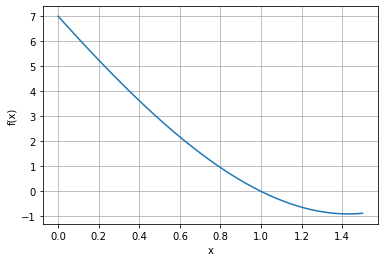

In [3]:
# Definimos la funcion
def f(x):
    return x**3+x**2-9*x+7

a      = 0    # Punto inicial del intervalo
b      = 1.5  # Punto final del intervalo
tol    = 1e-8 # Tolerancia criterio de parada
nitmax = 100  # Numero maximo de iteraciones

x, res, nit = biseccion(f, a, b, tol, nitmax)

# Representación de la funcion
import matplotlib.pyplot as plt
import numpy             as np

# Definimos un vector de puntos donde evaluar la funcion
x_vec = np.linspace(a, b, 100)

# Representamos la funcion
plt.plot(x_vec, f(x_vec))
plt.ylabel('f(x)')
plt.xlabel('x')
plt.grid()

### Convergencia del método

Tomando $c_n$ como aproximación de la raíz $x_*$ de una función $f$, el error en la iteración $n$-ésima verifica:

$$|e_n| = |x_* - c_n| \leq \frac{1}{2} |b_n - a_n|.$$

Por otro lado, 

$$|b_n - a_n| = \frac{1}{2} |b_{n-1} - a_{n-1}|, \quad n = 1,2,3, \ldots$$

Entonces, 

$$|e_n| \leq \frac{1}{2^{n+1}} |b_0 - a_0|,$$

siendo $a_0 = a$ y $b_0 = b$. De esta forma, $|e_n| \rightarrow 0$ cuando $n \rightarrow \infty$.


Obsérvese que es posible obtener *a priori* el número de iteraciones necesario para lograr una cierta precisión $\varepsilon_x$. Puesto que $|e_n| \leq \displaystyle\frac{1}{2^{n+1}} |b_0 - a_0|$, basta con obtener el primer valor de $n$ tal que:

$$\frac{1}{2^{n+1}} |b_0 - a_0| \leq \varepsilon_x,$$

esto es,

$$n \geq \frac{\log(|b_0 - a_0|) - \log(\varepsilon_x)}{\log(2)} - 1.$$


A continuación se recoge un resultado formal de convergencia del método de bisección.

<ul>
    <li>
        <i>Teorema 1</i>:
    </li>
</ul>

Sea $f: [a, b] \subset \mathbb R \rightarrow \mathbb R$ una función continua sobre el intervalo $[a, b]$ y tal que $f(a) f(b) < 0$. Sean $\{a_n\}_{n=0}^{\infty}$, $\{b_n\}_{n=0}^{\infty}$ y $\{c_n\}_{n=0}^{\infty}$ las sucesiones generadas por el método de bisección. Entonces, denotando mediante $x_*$ una raíz de $f$ en $[a, b]$, se tiene:

* $\displaystyle\lim_{n\rightarrow\infty} a_n = \displaystyle\lim_{n\rightarrow\infty} b_n = \displaystyle\lim_{n\rightarrow\infty} c_n = x_*$.
* $|x_* - c_n| \leq 2^{-(n+1)}(b-a)$.

### Algunas observaciones sobre el método

El método de bisección es un método robusto, pero con una convergencia relativamente lenta. En caso de que la raíz esté más cerca de uno de los extremos (esperable si los valores absolutos de la función en los dos extremos son muy diferentes), una mejora del algoritmo consistiría en dividir el intervalo de otra manera.

Para emplear correctamente el método es necesario separar previamente una raíz, ya que el algoritmo únicamente puede calcular una. Además, la función debe ser continua, puesto que en otro caso se podría confundir una singularidad con una raíz al utilizar el criterio de parada sobre $\varepsilon_x$. Puede usarse el código anterior para comprobar fácilmente esto con algún ejemplo.

La combinación de los criterios de parada sobre el valor del residuo y sobre la amplitud del intervalo permite detectar problemas mal condicionados, ya que en estos el primero de los criterios se satisface fácilmente, pero no el segundo.

Como se ha visto, es fácil predecir el número necesario de etapas del método de bisección para lograr una determinada precisión. Para una estimación *grosera* de este número obsérvese que $2^{10} = 1024 \simeq 10^3$ por lo que cada $10$ iteraciones del método la longitud del intervalo se habrá dividido aproximadamente por $1000$. Así, si la separación de la raíz que se busca proporciona un intervalo de una longitud (de orden) unidad serán necesarias unas $10$ iteraciones para tener una precisión de milésimas (de forma que se calculan correctamente dos decimales) y unas $20$ si se quiere un precisión de millonésimas (cinco decimales correctos).   

## Método de Newton-Raphson

Dada una función $f: [a, b] \subset \mathbb R \rightarrow \mathbb R$ cualquiera, tal y como se ha commentado, en general no se dispone de técnicas analíticas para resolver de forma exacta la ecuación

$$f(x) = 0.$$

Sin embargo, sí se dispone de técnicas para calcularla cuando $f$ es una función simple, por ejemplo un polinomio de orden uno o dos.

El método de Newton-Raphson propone sustituir la función $f$ por el polinomio de Taylor de orden uno en el entorno de una aproximación de la raíz $x_*$ para resolver la ecuación. Así, si se cuenta con una cierta aproximación de $x_*$, que denotamos $x_{n}$, el método de Newton-Raphson propone calcular una nueva aproximación $x_{n+1}$ resolviendo:

$$P_n(x_{n+1}) = 0,$$

donde

$$P_n(x) = f(x_n) + f'(x_n)(x-x_n).$$

De esta forma, el método genera una sucesión a partir de un iterante inicial $x_0$ y la siguiente fórmula de recurrencia

$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$

que se espera que converja a $x_*$.

A continuación se muestra un ejemplo de implementación del algoritmo en una función (para Python 3.8.10) donde, como en el ejemplo anterior, deberán comentarse adecuadamente los argumentos de entrada.

In [4]:
def newton(f, df, x0, tol_x, tol_f, nitmax):

    for nit in range(nitmax):

        # Calcular valor de x (si es posible)
        if df(x0) != 0.0:
            x = x0 - f(x0)/df(x0)
        else:
            print("No es posible iterar: f'(xn)=0")
            break

        # Calcular valor de la diferencia entre x y x0
        dif = abs(x-x0)
        # Calcular valor del residuo
        res = abs(f(x))

        print('Iteracion %d, x = %0.9f, |x-xn| = %0.6e y f(x) = %0.6e' % (nit+1, x, dif, res))

        # Criterios de convergencia
        if dif < tol_x:
            break
        else:
            x0 = x

        if res < tol_f:
            break

    return x, res, nit

<ul>
    <li>
        <i>Ejemplo 2</i>:
    </li>
</ul>

Se propone utilizar el método de Newton-Raphson para calcular la única raíz de  $f(x) = x^3+x^2-9x+7$ en el intervalo $[0, 1.5]$, tomando como iterante inicial el punto medio del intervalo $x_0 = 0.75$. Se sugiere emplear la representación de esta función (en una figura anterior) para generar gráficamente los iterantes del método de Newton-Raphson (obsérvese que se tratará de la intersección de la recta tangente al grafo de la función en el punto correspondiente al iterante con el eje de abscisas) y comprombar la rápida convergencia de la sucesión. 

El siguiente código utiliza la función ``newton`` definida previamente para calcular la raíz de la función en el intervalo dado. Obsérvese que el método de Newton-Raphson converge a la raíz con una tolerancia de $10^{-8}$ en 4 iteraciones, cuando el método de bisección requería 28 iteraciones para detenerse con esa misma tolerancia.

In [5]:
# Definimos la funcion
def f(x):
    return x**3+x**2-9*x+7

# Definimos la derivada de la funcion
def df(x):
    return 3*x**2+2*x-9

x0     = 0.75 # Iterante inicial
b      = 1.5  # Punto final del intervalo
tol_x  = 1e-8 # Tolerancia
tol_f  = 1e-8 # Tolerancia
nitmax = 20   # Numero maximo de iteraciones

x, res, nit = newton(f, df, x0, tol_x, tol_f, nitmax)

Iteracion 1, x = 0.962365591, |x-xn| = 2.123656e-01 y f(x) = 1.561497e-01
Iteracion 2, x = 0.998706304, |x-xn| = 3.634071e-02 y f(x) = 5.181477e-03
Iteracion 3, x = 0.999998332, |x-xn| = 1.292028e-03 y f(x) = 6.673023e-06
Iteracion 4, x = 1.000000000, |x-xn| = 1.668250e-06 y f(x) = 1.113243e-11


### Algunas observaciones sobre el método

En la implementación del método ha de incluirse un test de parada sobre los iterantes $|x_{n+1}-x_{n}|$ y otro sobre el valor del residuo $f(x_n)$. Del mismo modo que en el método de la bisección, la relación entre ambos se encuentra ligada al condicionamiento del problema. Sin embargo, para el método de Newton-Raphson (a diferencia del método de bisección) la información sobre el condicionamiento se obtiene de modo directo pues se calcula explícitamente el valor de $f'(x_n)$ como parte de la iteración.

El método solo funcionará bien si se arranca de un iterante inicial cercano a la solución. En otro caso, el resultado de una iteración puede hacer que el siguiente iterante se aleje de la raíz y que la sucesión no converja o que lo haga a otra raíz (que inicialmente podría estar más alejada). Empléese el código anterior para hacer variar el iterante inicial y observar el comportamiento de la sucesión generada por el método de Newton-Raphson en cada caso. 

Calcular la derivada de la función $f$ puede ser difícil (piénsese en alguno de los ejemplos comentados anteriormente, como la obtención de $f$ mediante la realización de un ensayo experimental o la ejecución de un programa de simulación). Incluso en aquellos casos donde $f$ corresponde a una expresión matemática puede ser costoso obtenerla (si la expresión es muy complicada) y resultará sencillo cometer errores en el cálculo de la derivada (lo que hará que ya no se esté usando la recta tangente al grafo de la función sino una recta que pasa por el punto pero tiene una pediente arbitraria, con lo que se perderán todas las propiedades de convergencia del esquema). Para solventar estas dificultades se pueden utilizar adoptar diferentes estrategias, como el empleo de fórmulas de derivación numérica o la reformulación del método. Se volverá sobre esta cuestión más adelante.

### Convergencia local del método

Definiendo el error absoluto en la etapa $n$-ésima del método como:

$$ e_{n} = x_{n} - x_*,$$

se deduce que

$$ e_{n+1} = x_{n+1} - x_* = x_n - \frac{f(x_n)}{f'(x_n)} - x_* = e_n - \frac{f(x_n)}{f'(x_n)} = \frac{e_n f'(x_n) - f(x_n)}{f'(x_n)}.$$

Por otro lado, utilizando el desarrollo en serie de Taylor centrado en $x_n$

$$0 = f(x_*) = f(x_n - e_n) = f(x_n) - e_n f'(x_n) + \frac{1}{2} e_n^2f''(\xi_n),$$

donde $\xi_n \in (a_n, b_n)$. Combinando las dos expresiones anteriores se llega a una relación entre $e_{n+1}$ y $e_n$:

$$e_{n+1} = \frac{f''(\xi_n)}{2f'(x_n)}e_n^2.$$

De esta forma, conforme $x_n$ se acerque a $x_*$ se espera que:

$$e_{n+1} = \frac{f''(\xi_n)}{2f'(x_n)}e_n^2 \simeq \frac{f''(x_*)}{2f'(x_n)}e_n^2.$$

A continuación se recoge un resultado formal de convergencia local del método.

<ul>
    <li>
        <i>Teorema 2 (Convergencia local del método de Newton-Raphson)</i>:
    </li>
</ul>


Sea $f: [a, b] \subset \mathbb R \rightarrow \mathbb R$ una función $\mathcal C^2([a,b])$ en un entorno de $x_*$ y sea $x_*$ una raíz simple de $f$, esto es $f'(x_*) \neq 0$. Existe un entorno $(x_*-\delta, x_*+\delta)$ tal que si se toma $x_0 \in (x_*-\delta, x_*+\delta)$ se tiene:

* $\displaystyle\lim_{n\rightarrow\infty} x_n = x_*$.
* $\exists C>0$ tal que $|x_{n+1} - x_*| \leq C |x_{n} - x_*|^2$, $\forall n \geq 0$.


Desde el punto de vista computacional, el resultado de convergencia cuadrática del método posee gran interés. Este indica, *grosso modo*, que el número de decimales exactos en la aproximación de la raíz se dobla en cada iteración. Veamos un ejemplo.

<ul>
    <li>
        <i> Ejemplo 3</i>:
    </li>
</ul>

Para un número real positivo $r$ se considera el cálculo de su raíz cuadrada $s = \sqrt{r}$ como solución de la ecuación

$$f(x) = x^2 - r = 0.$$

Tomando $r = 17$ y partiendo de $x_0 = 4$, se obtienen los siguientes 4 iterantes:

$$
\begin{array}{rcl} 
x_1 & = & 4.12,\\
x_2 & = & 4.123106, \\
x_3 & = & 4.1231056256177, \\
x_4 & = & 4.123105625617660549821409856,
\end{array}
$$

donde únicamente se representan decimales exactos en cada paso. Nótese que el almacenamiento de decimales exactos en $x_4$ requiere más precisión que la norma ANSI/IEEE de doble precisión (8 bytes).

A partir del resultado anterior, se sabe que $e_{n+1} \simeq C e_n^2$, donde $C = \displaystyle\frac{f''(x_*)}{2f'(x_*)}$. Aplicando esto al ejemplo se tiene que:

$$C = \displaystyle\frac{1}{2\sqrt{17}} \simeq 0.12127 \quad \text{y} \quad e_0 = x_0 - \sqrt{17} \simeq -0.12311.$$

De esta forma:

$$
\begin{array}{rcl} 
e_1 \simeq C e_0^2 & \simeq & 1.8383 \cdot 10^{-3},\\
e_2 \simeq C e_1^2 & \simeq & 4.0959 \cdot 10^{-7}, \\
e_3 \simeq C e_2^2 & \simeq & 2.0344 \cdot 10^{-14}, \\
e_4 \simeq C e_3^2 & \simeq & 5.0191 \cdot 10^{-29}.
\end{array}
$$

Como curiosidad, se puede mencionar que la implementación del cálculo de la raíz cuadrada en un microprocesador se hace con frecuencia empleando esquemas de este tipo. La razón es que las unidades ALU de los microprocesadores habitualmente solo pueden calcular sumas, restas, productos y multiplicaciones, de modo que el resto de las funciones y operaciones se deben implementar vía *software* (de bajo nivel). Las iteraciones del método de Newton-Raphson para el cálculo de la raíz cuadrada en este ejemplo efectivamente solo requieren usar sumas y productos pues se puede escribir

$$ x_{n+1} = \frac{x_n^2 + r}{2 x_n} $$


#### Algunas observaciones sobre la convergencia del método

El resultado de convergencia expuesto únicamente tiene sentido (e interés) cerca de la solución de la ecuación, donde $e_{n+1} \approx C e_n^2$. Por otro lado, una vez cerca de la solución y para un problema donde $C$ tiene orden unidad (lo que excluye los casos mal condicionados o casos donde la derivada segunda puede tomar valores absolutos muy grandes), la relación anterior muestra que la rápida convergencia del ejemplo anterior ocurrirá también de forma general: arrancando con un iterante inicial con error $e_0 \sim 10^{-1}$ cabe esperar que $e_1 \sim 10^{-2}$, $e_2 \sim 10^{-4}$, $e_3 \sim 10^{-8}$ y $e_4 \sim 10^{-16}$ y bastarán entonces cuatro iteraciones para tener tanta precisión como permite el almacenamiento en coma flotante con 64 bits. Obsérvese que, en comparación, el método de bisección necesita $50$ iteraciones para reducir un intervalo de longitud de unas d\'ecimas a un intervalo de longitud del orden de $10^{-16}$. 

De modo resumido, el resultado expuesto no asegura la convergencia del método de Newton-Raphson ni permite estimar el número de iteraciones. Sin embargo, sí que garantiza que serán necesarias pocas iteraciones muy cerca de la solución, siempre que $f$ sea regular y $f'(x_*) \neq 0$.

La convergencia del método de Newton-Raphson es peor en problemas mal condicionados, donde $|f'(x_*)|$ toma un valor muy reducido (o es incluso nulo). Puede comprobarse esto adaptando el código anterior para encontrar la única solución de la ecuación $x^2 - 2x + 1 = 0$. Resultará útil, de cara a comprender el comportamiento del método en este caso (infinitamente mal condicionado) representar la correspondiente función $f(x)$ y esbozar los primeros iterantes (comparando la situación con la que se presentaba en el ejemplo 2).

La implementación en aritmética finita introduce una complejidad adicional en casos como el anterior. Una ecuación con una raíz doble puede dar lugar a que, al operar en aritmética finita, aparezcan dos raíces reales distintas (pero muy próximas) o a que desaparezca esa raíz (apareciendo dos raíces complejas conjugadas, con una parte imaginaria muy reducida). Es fácil interpretar este hecho observando que la aritmética finita hace que en vez de operar con la función $f(x)$ se haga (debido a los errores de redondeo) con una función $f(x) + \epsilon(x)$ (donde $\epsilon(x)$ representa el efecto de los redondeos). 


### Convergencia global del método

Bajo ciertas hipótesis es posible asegurar la convergencia del método de Newton-Raphson arrancando desde un iterante cualquiera en un cierto conjunto. Es raro que se puedan aplicar resultados de convergencia de este tipo (global) en la práctica, pues necesitan imponer condiciones sobre la función $f$ difíciles de verificar (ya se ha comentado que $f$ puede no ser siquiera una expresión matemática conocida), pero sí hay algunas situaciones donde es crítico poder hacerlo (como en la implementación del cálculo de la raíz cuadrada mencionado anteriormente). 

A continuación se muestra un resultado que garantiza la convergencia con (cierta) independencia del iterante incial.

<ul>
    <li>
        <i>Teorema 3 (Convergencia global del método de Newton-Raphson)</i>:
    </li>
</ul>

Sea $f: [a, b] \subset \mathbb R \rightarrow \mathbb R$ una función $\mathcal C^2([a,b])$ tal que:

* $f''(x) > 0$, $\forall x \in (a,b)$,
* $f'(x) > 0$, $\forall x \in (a,b)$,
* $f(a) f(b) < 0$.

Entonces $f$ tiene exactamente una raíz en $(a,b)$ y el método de Newton-Raphson converge a ella para cualquier iterante inicial $x_0 \in (a,b)$, siempre que el primer iterante $x_1$ se encuentre en $(a,b)$.



## Método de la secante

Existen otros métodos numéricos para la resolución de ecuaciones no lineales que buscan propiedades de convergencia similares a las del método de Newton-Raphson pero evitando la evaluación de la derivada de la función $f$, tratando con aproximaciones numéricas de esta. Uno de estos métodos es el llamado método de la secante.

La idea de este método es muy simple y se basa en las técnicas de derivación numérica ya estudiadas. En particular, si el método ya ha calculado al menos un iterante, de modo que se dispone de dos aproximaciones $x_{n}$ y $x_{n-1}$, es posible aproximar el valor de $f'(x_n)$ utilizando el esquema descentrado

$$ f'(x_n) \simeq \frac{f(x_n) - f(x_{n-1})}{x_n - x_{n-1}} $$

Así, dada $f: [a, b] \subset \mathbb R \rightarrow \mathbb R$ una función regular y $x_{0}$ y $x_{1}$ dos valores próximos a la raíz buscada, el *método de la secante* propone generar una sucesión a través de la fórmula de recurrencia (de tres términos)

$$x_{n+1} = x_n - f(x_n)\frac{x_n - x_{n-1}}{f(x_n) - f(x_{n-1})} 
          = \frac{x_{n-1} f(x_n) - x_n f(x_{n-1})}{f(x_n) - f(x_{n-1})} .$$

Nótese que a medida que $x_n$ se acerca a $x_*$ la aproximación de la derivada mejora, aunque debe prestarse atención a la pérdida de precisión debido a la división por un valor pequeño.

Puesto que se trata de un método basado en el método de Newton-Raphson donde la derivada se sustituye por una aproximación, se espera que sus propiedades sean similares. En cierto modo, así es pero con algunos matices, como se va a ver.

Por un lado, se había observado que el método de Newton-Raphson podría tener dificultades al arrancar si el iterante inicial $x_0$ no estaba muy cerca de la solución. Aunque el método de la secante puede presentar dificultades similares a las de Newton-Raphson en cuanto a convergencia global, es posible hacer que se comporte de forma mucho más robusta y evite esas dificultades en la mayor parte de los casos. Así, por ejemplo, pueden tomarse $x_0$ y $x_1$ rodeando a la raíz $x_{*}$ que se busca (en vez de tomar dos valores muy próximos entre sí, como sugeriría la aproximación de la derivada con un error reducido). Existe una variante del método de la secante, conocido como método de *regula falsi*, que resuelve las dificultades de convergencia global del método de la secante y de Newton-Raphson (a coste de una pérdida de velocidad de convergencia) eligiendo no solo $x_0$ y $x_1$ de forma que contengan un cambio de signo de $f$ (lo que asegura que el intervalo contiene a la raíz $x_{*}$) sino seleccionando tras cada nueva iteración (hecha con la misma fórmula que el método de la secante) las dos aproximaciones que se emplearán en la siguiente iteración de modo que contengan un cambio de signo de $f$ (en ese sentido, el método de *regula falsi* es más parecido al método de bisección, modificando simplemente la forma de dividir el intervalo: si el método de bisección divide el intervalo siempre por la mitad, el método de *regula falsi* lo hace mediante el punto de corte de la secante con el eje de abscisas).

Por otro lado, también hay una pequeña diferencia en la velocidad con la que la sucesión generada por el método converge a la raíz (derivada del hecho de emplear una aproximación de la derivada y no la propia derivada). A continuación se presenta un teorema que asegura la convergencia local del método y estima el deterioro de la convergencia (en comparación con el método de Newton-Raphson) causado por el empleo de una aproximación de la derivada.

<ul>
    <li>
        <i>Teorema 4 (Convergencia local del método de la secante)</i>:
    </li>
</ul>

Sea $f: [a, b] \subset \mathbb R \rightarrow \mathbb R$ una función $\mathcal C^2([a,b])$ en un entorno de $x_*$ y sea $x_*$ una raíz simple de $f$. Entonces, existe un entorno $(x_*-\delta, x_*+\delta)$ tal que si se toman $x_0, x_1 \in (x_*-\delta, x_*+\delta)$ se tiene:

* $\displaystyle\lim_{n\rightarrow\infty} x_n = x_*$.
* $\exists C'>0$ tal que $|x_{n+1} - x_*| \leq C' |x_{n} - x_*|^\alpha$, $\forall n \geq 0$ y con $\alpha = (1+\sqrt{5})/2\approx 1.62.$


Puede retomarse de nuevo el ejemplo con el que se ha ilustrado la aplicación del método de bisección y el método de Newton-Raphson para aplicar ahora el método de la secante y observar las diferencias entre las tres técnicas. Téngase en cuenta que, para la programación de la función que implemente el método de la secante (a diferencia de la función que implementa el método de Newton-Raphson), es necesario contar con dos pasos anteriores y no con uno. 

Por otro lado, para comparar el método de la secante con el método de Newton-Raphson considérense dos situaciones distintas:
 
* un caso donde el método de Newton-Raphson converge rápidamente a la solución y donde, al arrancar el método de la secante con dos puntos próximos entre sí (y próximos al iterante inicial usado para el método de Newton-Raphson), se obtiene una convergencia similar pero ligeramente más lenta.  

* un caso (anteriormente se sugirió un ejemplo) donde el método de Newton-Raphson arranca de un punto alejado de la raíz y no convergee (o lo hace tras muchas iteraciones) para, en este caso, observar que el método de la secante arrancando de los puntos relativamente alejados de la raíz pero encerrando a ésta, sí es capaz de converger.

## Orden de convergencia

Se introduce a continuación la definición de orden de convergencia que resultará de gran utilidad a la hora de comprender la velocidad de convergencia de los diferentes métodos.

<ul>
    <li>
        <i>Definición 1 (Orden de convergencia)</i>:
    </li>
</ul>

Sea $\{x_n\}$ una sucesión generada por un cierto método numérico, la cual converge a un valor $x_*$. Se denomina *orden de convergencia* al mayor número real $q$ tal que el límite

$$ \lim_{n\rightarrow\infty} \frac{|x_{n+1} - x_*|}{|x_{n} - x_*|^q} $$

existe y es distinto de cero.


Nótese que puede ocurrir que este número no exista. Un ejemplo de esto serían las sucesiones generadas por el método de la bisección.

El orden de convergencia, junto con la robustez y el coste computacional, es una propiedad muy importante de los métodos numéricos. Recordando los resultados de convergencia local de los métodos de Newton-Raphson y la secante y utilizando la definición de orden, se observa que el método de Newton tiene orden dos mientras que el de la secante es solo de orden $\alpha = 1.62$. Por tanto, es posible anticipar de a partir de esta información que el método de Newton-Raphson converge más rápidamente cerca de la raíz.

## Sistemas de ecuaciones no lineales

Se considera ahora el problema de encontrar el valor de varias variables a partir de un sistema de ecuaciones. En particular, dado un sistema de $N$ ecuaciones, se buscará el valor de $N$ incógnitas. Obsérvese, por un lado, que en caso de tener un número de incóginas ($M$) mayor que el número de ecuaciones, se tendrá que bajo ciertas condiciones (tal y como se ha estudiado en la asignatura *Matemáticas II*) se podrá asegurar que $N$ variables pueden escribirse como funciones del resto ($M-N$), pudiendo entonces considerar al resto de las variables ($M-N$) como parámetros de las ecuaciones. En lo sucesivo, se considerará exclusivamente el caso de un sistema de $N$ ecuaciones con $N$ incógnitas. 

Un caso particular es, desde luego, cuando todas las ecuaciones hacen aparecer linealmente a las variables (esto es, tenemos un sistema de $N$ ecuaciones lineales). En este caso, ya se han estudiado métodos (tanto directos como iterativos) para resolver el sistema de ecuaciones. Lo que se va a estudiar a continuación es cómo resolver numéricamente el caso general, donde las ecuaciones hacen aparecer de forma cualquiera a las variables (aunque sí se deberá asumir, como se detallará, una cierta regularidad en las funciones que aparecen).

De modo general, se considera entonces el problema de encontrar los valores $x_1$, $x_2$, $\ldots$ y $x_N$ que satisfacen el siguiente sistema de ($N$) ecuaciones

$$
\begin{array}{cc} 
F_1(x_1, x_2, \ldots, x_N) & = 0, \\
F_2(x_1, x_2, \ldots, x_N) & = 0, \\
\vdots & \\
F_N(x_1, x_2, \ldots, x_N) & = 0,
\end{array}
$$

Podemos reescribir el problema de forma vectorial, a fin de tener una expresión más compacta de los métodos. Se introduce para ello una función vectorial $\mathbf F: D \subset \mathbb R^N \rightarrow \mathbb R^N$. De esta forma, resolver el sistema de ecuaciones no lineales consistirá en encontrar $\mathbf x_* \in D$ tal que $\mathbf F(\mathbf x_*) = \mathbf 0$.

### Método de Newton

Una de las ventajas del método de Newton-Raphson, además de su velocidad de convergencia, es que puede extenderse de forma más o menos inmediata para resolver sistemas de ecuaciones no lineales. Suponiendo $\mathbf x_n$ una cierta aproximación de $\mathbf x_*$, es posible sustituir $\mathbf F(\mathbf x)$ por su desarrollo de Taylor de grado uno en torno a $\mathbf x_n$, esto es,

$$\mathbf P_n(\mathbf x) = \mathbf F(\mathbf x_n) + (\mathbf x -\mathbf x_n) D\mathbf F(\mathbf x_n),$$

donde la *matriz jacobiana* de $\mathbf F$ en $\mathbf x_n$ se define como:

$$
D\mathbf F(\mathbf x_n) = 
\left(\begin{array}{ccc} 
\displaystyle\frac{\partial F_1}{\partial x_1}(\mathbf x_n) & \ldots & \displaystyle\frac{\partial F_1}{\partial x_N}(\mathbf x_n)\\
\vdots & & \vdots \\
\displaystyle\frac{\partial F_N}{\partial x_1}(\mathbf x_n) & \ldots & \displaystyle\frac{\partial F_N}{\partial x_N}(\mathbf x_n)
\end{array}\right).
$$ 

De esta forma, siempre que $D\mathbf F$ sea invertible en el entorno de $\mathbf x_*$, se puede calcular $\mathbf x_{n+1}$ resolviendo 
$$ \mathbf P_n(\mathbf x_{n+1}) = \mathbf 0  $$
tal y como se hacía en el método de Newton-Raphson (cuando solamente se tenía una ecuación y el polinomio de Taylor era una función escalar de una sola variable). La ecuación vectorial anterior representa entonces un sistema de ecuaciones lineales para las compoenntes del vector $\mathbf x_{n+1}$:

$$\mathbf F(\mathbf x_n) + (\mathbf x_{n+1} -\mathbf x_n) D\mathbf F(\mathbf x_n) = \mathbf 0.$$

Reorganizando términos para reducir el número de operaciones realizadas, se calcula $\mathbf x_{n+1}$ como:

$$\mathbf x_{n+1} = \mathbf x_n + \boldsymbol \Delta x_n,$$

donde $\boldsymbol \Delta x_n$ es la solución del sistema lineal:

$$D\mathbf F(\mathbf x_n) \boldsymbol \Delta x_n = - \mathbf F(\mathbf x_n).$$

A continuación se muestra un ejemplo de implementación del algoritmo en Python 3.8.10 donde, como en los casos anteriores, será conveniente añadir unas líneas de comentarios describiendo los argumentos de la función.

In [6]:
import numpy as np

def newton_sist(f, df, x, tol, nitmax):

    # Inicializacion
    x0 = x

    for nit in range(nitmax):

        # Calculo de f(x_n)
        f0 = f(x0)

        # Calculo de Jf(x_n)
        jacob = df(x0)

        # Calculo de dxn
        dx = np.linalg.solve(jacob, f0)

        # Calculo de xn+1
        x = x0 - dx

        # Criterio de convergencia
        norma_dx = np.linalg.norm(dx, 2)

        print('Iteracion %d, x* = [%0.9f, %0.9f] y |x-xn| = %0.9e' % (nit+1, x[0], x[1], norma_dx))

        if norma_dx < tol:
            break # Convergencia alcanzada
        else:
            x0 = x # Actualizacion para nueva iteracion

    return x, norma_dx, nit

<ul>
    <li>
        <i>Ejemplo 4</i>:
    </li>
</ul>

Se propone utilizar el anterior código para calcular los puntos de corte de la circunferencia $x^2 + y^2 = 2$ y la recta $x = y$. De otro modo, se buscan $x$ e $y$ tales que se verifique el sistema de ecuaciones (no lineales):

$$ x^2 + y^2 = 2$$
$$ x = y$$

Para escribir el sistema de la forma (vectorial) $\mathbf F (\mathbf x) = \mathbf 0$, se tomará $\mathbf x = (x, y)$ así como $\mathbf F = (F_1, F_2)$. De esta forma, se define

$$
\begin{array}{rcl} 
F_1(x_1,x_2) & = & x^2 + y^2 - 2,\\
F_2(x_1,x_2) & = & x - y.
\end{array}
$$

Así, se obtiene la siguiente matriz jacobiana:

$$
D\mathbf F(x, y) = 
\left(\begin{array}{cc} 
\displaystyle\frac{\partial F_1}{\partial x}(x, y) & \displaystyle\frac{\partial F_1}{\partial y}(x, y)\\
\\
\displaystyle\frac{\partial F_2}{\partial x}(x, y) & \displaystyle\frac{\partial F_2}{\partial y}(x, y)
\end{array}\right) =
\left(\begin{array}{cc} 
2x & 2y\\
1 & -1
\end{array}\right).
$$

El siguiente código resuelve el sistema de ecuaciones no lineales utilizando la implementación previa del método de Newton. Como se ve, el comportamiento del método en lo que tiene que ver con la velocidad de convergencia es muy similar al que presentaba en el caso escalar (esto es, para una única ecuación con una incógnita). A continuación se verá un resultado que muestra, en efecto, la generalización de las propiedades de convergencia local del método.

In [7]:
import numpy as np

# Definimos la funcion
def f(x):

    fval = np.array([x[0]**2 + x[1]**2 - 2,
                     x[0] - x[1]])

    return fval

# Definimos de la matriz jacobiana
def df(x):

    jac = np.array([[2*x[0], 2*x[1]],
                    [1.0,    -1.0]])

    return jac

x0     = np.array([0.6, 1.3]) # Iterante inicial
tol    = 1e-8 # Tolerancia
nitmax = 40   # Numero maximo de iteraciones

x, res, nit = newton_sist(f, df, x0, tol, nitmax)

Iteracion 1, x* = [1.065789474, 1.065789474] y |x-xn| = 5.213582304e-01
Iteracion 2, x* = [1.002030539, 1.002030539] y |x-xn| = 9.016874971e-02
Iteracion 3, x* = [1.000002057, 1.000002057] y |x-xn| = 2.868706676e-03
Iteracion 4, x* = [1.000000000, 1.000000000] y |x-xn| = 2.909553861e-06
Iteracion 5, x* = [1.000000000, 1.000000000] y |x-xn| = 2.992910245e-12


### Convergencia del método de Newton

Cabe esperar que las propiedades de convergencia local del método sean similares a las del método de Newton-Raphson para ecuaciones no lineales escalares. Recordemos que en el caso escalar para asegurar la convergencia cuadrática del algoritmo era necesario que la raíz fuese simple, lo que implicaba $f'(x_*) \neq 0$. Por tanto, para el método de Newton para sistemas de ecuaciones no lineales parece natural que dicha condición se transforme en una hipótesis de regularidad sobre la matriz jacobiana $D\mathbf F(\mathbf x_*)$.

En efecto, puede demostrarse que el método de Newton para la resolución de sistemas de ecuaciones no lineales converge local y cuadráticamente siempre que $\mathbf F \in \mathcal C^2(D)$ en el entorno de la solución $\mathbf x_*$ y que $D\mathbf F(\mathbf x)$ sea regular en dicho entorno. A continuación se recoge un resultado formal de convergencia del algoritmo con condiciones más débiles.

<ul>
    <li>
        <i>Teorema 5 (Convergencia local del método de Newton para sistemas)</i>:
    </li>
</ul>

Sea $\mathbf F: D \subset \mathbb R^N \rightarrow \mathbb R^N$ tal que $\mathbf F \in \mathcal C^1(D)$, donde $D$ es convexo, abierto y contiene a la raíz $\mathbf x_*$. Supongamos que $D\mathbf F^{-1}(\mathbf x)$ existe y que existen unas constantes positivas $R$, $C$ y $L$ tales que $\| D\mathbf F^{-1}(\mathbf x_*) \| \leq C$ y

$$\| D\mathbf F(\mathbf x) - D\mathbf F(\mathbf y) \|_M \leq L \| \mathbf x - \mathbf y \|, \quad \forall \mathbf x, \mathbf y \in B(\mathbf x_*; R),$$

donde $\| \cdot \|$ denota la norma euclídea en $\mathbb R^{N}$ y $\| \cdot \|_M$ la correspondiente norma matricial subordinada. Entonces existe $r>0$ tal que, para cualquier $\mathbf x_0 \in B(\mathbf x_*; R)$, la sucesión generada por el método de Newton está definida de forma única y converge a $\mathbf x_*$ con 

$$\|\mathbf x_{n+1} - \mathbf x_*\| \leq C L \|\mathbf x_n - \mathbf x_*\|^2.$$

Obsérvese que el problema considerado en el ejemplo 4 verifica en efecto las hipótesis de este teorema y la convergencia observada refleja, en efecto, la convergencia cuadrática que este teorema asegura. Se va a considerar ahora un caso en que falla la condición sobre la invertibilidad de la matriz jacobiana (que correspondería en el caso escalar a que la derivada de $f$ se cancele en la raíz donde, como se pedía comprobar, la convergencia del método de Newton-Raphson era mucho más lenta).   

<ul>
    <li>
        <i>Ejemplo 5</i>:
    </li>
</ul>

Se va a usar el método de Newton para encontrar la (única) solución del siguiente sistema de ecuaciones no lineales:

$$ \exp(x^2 + y^2) - 1 = 0,$$
$$ \exp(x^2 - y^2) - 1 = 0.$$

que está situada en el origen. Definiendo $\mathbf F(x,y) = (F_1(x,y), F_2(x,y))$ con $F_1(x,y) = \exp(x^2 + y^2) - 1$ y $F_2(x,y) = \exp(x^2 - y^2) - 1$, se calcula la siguiente matriz jacobiana:

$$
D\mathbf F(x, y) = 
\left(\begin{array}{cc} 
2x\exp(x^2 + y^2) & 2y\exp(x^2 + y^2)\\
2x\exp(x^2 - y^2) & -2y\exp(x^2 - y^2)\\
\end{array}\right).
$$

Obsérvese que la matriz $D \mathbf F$ es singular en la solución $(x,y)=(0,0)$.

El siguiente código resuelve el sistema de ecuaciones no lineales utilizando la implementación previa del método de Newton.

In [9]:
import numpy as np

# Definimos la funcion
def f(x):

    fval = np.array([np.exp(x[0]**2 + x[1]**2)-1,
                     np.exp(x[0]**2 - x[1]**2)-1])

    return fval

# Definimos de la matriz jacobiana
def df(x):

    jac = np.array([[np.exp(x[0]**2 + x[1]**2)*2*x[0],  np.exp(x[0]**2 + x[1]**2)*2*x[1]],
                    [np.exp(x[0]**2 - x[1]**2)*2*x[0], -np.exp(x[0]**2 - x[1]**2)*2*x[1]]])

    return jac

x0     = np.array([0.1, 0.1]) # Iterante inicial
tol    = 1e-8 # Tolerancia
nitmax = 40   # Numero maximo de iteraciones

x, res, nit = newton_sist(f, df, x0, tol, nitmax)

Iteracion 1, x* = [0.050496683, 0.050496683] y |x-xn| = 7.000826191e-02
Iteracion 2, x* = [0.025312613, 0.025312613] y |x-xn| = 3.561565308e-02
Iteracion 3, x* = [0.012664413, 0.012664413] y |x-xn| = 1.788725730e-02
Iteracion 4, x* = [0.006333222, 0.006333222] y |x-xn| = 8.953655842e-03
Iteracion 5, x* = [0.003166738, 0.003166738] y |x-xn| = 4.478084434e-03
Iteracion 6, x* = [0.001583385, 0.001583385] y |x-xn| = 2.239199379e-03
Iteracion 7, x* = [0.000791694, 0.000791694] y |x-xn| = 1.119619338e-03
Iteracion 8, x* = [0.000395847, 0.000395847] y |x-xn| = 5.598121249e-04
Iteracion 9, x* = [0.000197924, 0.000197924] y |x-xn| = 2.799063695e-04
Iteracion 10, x* = [0.000098962, 0.000098962] y |x-xn| = 1.399532233e-04
Iteracion 11, x* = [0.000049481, 0.000049481] y |x-xn| = 6.997661623e-05
Iteracion 12, x* = [0.000024740, 0.000024740] y |x-xn| = 3.498830865e-05
Iteracion 13, x* = [0.000012370, 0.000012370] y |x-xn| = 1.749415586e-05
Iteracion 14, x* = [0.000006185, 0.000006185] y |x-xn| = 8.7

Como se ve, la velocidad de convergencia del método ya no es en esta caso cuadrática sino lineal. Se repite así la misma situación que en el caso escalar (una ecuación con una incógnita). 

### Modificaciones del método de Newton

Al igual que en el caso escalar, el método de Newton para sistemas de ecuaciones no lineales presenta dificultades en relación con la convergencia global: es necesario un iterante inicial cercano a la raíz $\mathbf x_*$ para que el algoritmo converja. De este modo, aunque resulte seguro emplear este método cuando ya se está muy cerca de la solución, es preciso modificar la estrategia en tanto no pueda asegurarte la cercanía a la solución. Por esta razón la implementación del método suele hacerse en combinación con otro tipo de técnicas o modificando el método para hacerlo más robusto. 

En el diseño de estrategias para hacer más robusto el método es habitual usar la información sobre la reducción del residuo del sistema de ecuaciones no lineales. Puede observarse que el problema de encontrar $\mathbf x_* \in \mathbb R^N$ tal que $\mathbf F(\mathbf x_*) = \mathbf 0$ se puede escribir como un problema de minimización del residuo, de la forma:

$$\min_{\mathbf x \in \mathbb R^N} J(\mathbf x)$$

donde $J(\mathbf x) = \|\mathbf F(\mathbf x) \|^2$. Así, el problema consiste en encontrar aquel $\mathbf x_*$ tal que:

$$\|\mathbf F(\mathbf x_*) \|^2 \leq \|\mathbf F(\mathbf x) \|^2, \quad \forall \mathbf x \in \mathbb R^N.$$

Entre las diferentes estrategias para hacer el algoritmo más robusto, hay dos técnicas bastante extendidas:

* Modificar el valor del paso (con el que el método de Newton pasa de $\mathbf x_n$ a $\mathbf x_{n+1}$).
* Combinar distintas direcciones (para pasar de $\mathbf x_n$ a $\mathbf x_{n+1}$).

que se detallarán a continuación.

#### Método de Newton amortigüado

El método de Newton acepta como buena la aproximación lineal que devuelve el polinomio de Taylor de grado uno, lo cual solo está justificado cuando se está muy cerca de la solución. De esta forma, si se está lejos de la solución el algoritmo puede proporcionar una buena dirección para buscar $\mathbf x_{n+1}$, ya que la corrección propuesta por el método de Newton, $\boldsymbol \Delta x_n = -(D\mathbf F(\mathbf x_n))^{-1} \mathbf F(\mathbf x_n)$, es una dirección de descenso del funcional $J$ en $\mathbf x_n$:

$$\boldsymbol \nabla J (\mathbf x_n) \cdot \boldsymbol \Delta x_n = 2 (D\mathbf F (\mathbf x_n))^T \mathbf F(\mathbf x_n) \ \boldsymbol \Delta x_n = -2 \|\mathbf F(\mathbf x_n)\|^2 \leq 0.$$

Sin embargo, el valor del paso puede no ser adecuado. Así, se propone modificar el paso del algoritmo de forma que cada iteración del mismo calcule

$$\mathbf x_{n+1} = \mathbf x_n + \omega_n \boldsymbol \Delta x_n,$$

dando lugar al llamado *método de Newton amortigüado*. Para la selección de $\omega_n$ se considera la minimización de la función de una variable $f(\omega)$ definida mediante 

$$f(\omega) = \| \mathbf F (\mathbf x_n + \omega \boldsymbol \Delta x_n)\|$$

para lo cual se usan diferentes técnicas iterativas (que, en general, tienen en cuenta que bastará con una solución aproximada del problema). De este forma se tienen dos bucles anidados: el bucle externo itera con el método de Newton (y elige la dirección en que se avanza hacia el siguiente iterante) en tanto que el bucle interno itera con un determinado método de optimización (para una función de una variable) para elegir la distancia a la que se toma el siguiente iterante (asegurándose de que se produce una reducción aceptable del resiudo).

#### Combinación de direcciones

A la hora de eligir una dirección para el vector $\mathbf x_{n+1} - \mathbf x_n$ es posible escoger una que combine la dirección proporcionada por el método de Newton con la que devuelven otras técnicas más robustas. De este modo se espera combinar la robustez de esas otras técnicas con la rápida convergencia local cuadrática del método de Newton. La idea consiste en otorgar un mayor peso a la predicción del paso del método de Newton cuando se está cerca de la solución, mientras que en caso contrario se daría más peso a la dirección de búsqueda que proponen los otros métodos.

Un ejemplo de esto es el *método híbrido de Powell*, el cual combina la dirección propuesta por el método de Newton y la dirección que proporciona el máximo descenso para el problema de minimización del funcional $J(\mathbf x) = \displaystyle\frac{1}{2}\|\mathbf F(\mathbf x) \|^2$, la cual viene dada por

$$\mathbf d = - \boldsymbol \nabla J (\mathbf x) = - (D\mathbf F (\mathbf x))^T \ \mathbf F(\mathbf x).$$

De esta forma, en cada iteración se elige un parámetro $\beta_n$ en función de lo cerca que parezca que el iterante se encuentra de la solución, y se construye:

$$\mathbf x_{n+1} = \mathbf x_n + \beta_n \mathbf d_n + (1 - \beta_n) \boldsymbol \Delta \mathbf x_n.$$

Se debe establecer además una estrategia para la selección de $\beta_n$ que haga que $\beta_n \simeq 0$ cuando se está cerca de la solución $\mathbf x_*$ en tanto que deberá seleccionar $\beta_n \simeq 1$ en tanto no se cumpla esa condición. 

#### Cálculo de matriz jacobiana

Además de las dificultades de convergencia global, el método de Newton presenta una grave deficiencia desde el punto de vista computacional. Esta está ligada al uso de la matriz jacobiana en cada paso, pues requiere conocer explícitamente dicha matriz, lo que puede originar a un alto coste computacional en cada iteración. La resolución de un sistema de $N$ ecuaciones no lineales utilizando este algoritmo obliga a escribir $N$ funciones para describir el sistema y $N^2$ funciones para describir cada componente de la matriz jacobiana. La implementacón y el cálculo de estas $N^2$ funciones puede convertirse en una tarea muy tediosa, así como en una fuente de errores. Para aliviar estas tareas existen dos alternativas:

* Utilizar cálculo simbólico para obtener la matriz jacobiana a partir de las expresiones de las funciones.
* Usar aproximaciones de la matriz jacobiana.

Sin embargo, estas alternativas para el cálculo de la matriz jacobiana no evitan el problema del alto coste computacional por iteración, resultado de evaluar una matriz de tamaño $N^2$ y la resolución del sistema asociado. Obsérvese que si dicha matriz no varía entre iteraciones se evitaría la evaluación y factorización de la matriz en cada iteración, reduciendo significativamente el coste computacional del método de Newton. Así, es habitual en la implementación del algoritmo no actualizar la matriz en todas las iteraciones sino hacerlo cada cierto número de etapas. En este caso es necesario prestar especial atención a que el ahorro del coste computacional no deteriore la convergencia del esquema.

A partir de la segunda estrategia surgen los *métodos cuasi-Newton*. Estos calculan una aproximación de la matriz jacobiana utilizando derivación numérica o generando una sucesión de matrices que aproximan la matriz. Un ejemplo de este último caso sería el conocido método de Broyden.



##### Método de Broyden

Del mismo modo que el método de la secante, el *método de Broyden* utiliza información de iterantes anteriores para aproximar la matriz jacobiana $D \mathbf F(\mathbf x)$ en cada etapa.

Sea $B_n$ la aproximación de la matriz jacobiana en la iteración $n$-ésima del algoritmo. La aproximación de la matriz jacobiana $B_{n+1}$ debe satisfacer la ecuación:

$$ B_{n+1} \ \boldsymbol \Delta \mathbf x_n = \mathbf F(\mathbf x_{n+1}) - \mathbf F(\mathbf x_n) = \boldsymbol \Delta \mathbf F_n.$$

De esta forma, dada una matriz $B_0$, el método de Broyden genera una sucesión de matrices para aproximar la matriz jacobiana de la siguiente manera:

$$ B_{n+1} = B_n + \displaystyle\frac{(\boldsymbol \Delta \mathbf F_n - B_n \boldsymbol \Delta \mathbf x_n) \cdot \boldsymbol \Delta \mathbf x_n}{\| \boldsymbol \Delta \mathbf x_n \|^2_2}.$$

Así, el método de Broyden proporciona una aproximación razonable de la matriz jacobiana sin requerir evaluaciones adicionales de la función.



##### Método usando esquema centrado de derivación numérica

En caso de utilizar fórmulas de derivación numérica para obtener una aproximación de $D \mathbf F(\mathbf x_n)$, denotada como $\mathcal G(\mathbf x_n)$, en el método de Newton se itera sobre:

$$\mathcal G(\mathbf x_n) (\mathbf x_{n+1} - \mathbf x_n) = -\mathbf F(\mathbf x_n).$$

Así, al usar una fórmula de derivación numérica con un esquema centrado, la matriz $\mathcal G(\mathbf x_n) \in \mathcal M_{N \times N}(\mathbb R)$ se calcula columna a columna. Definiendo como $\mathbf g_k$ la $k$-ésima columna de la matriz, esta se encuentra determinada por:

$$\mathbf g_k = \displaystyle\frac{\mathbf F(\mathbf x_n + h \mathbf e_k) - \mathbf F(\mathbf x_n - h \mathbf e_k)}{2h},$$

donde $\mathbf e_k$ es el $k$-ésimo vector de la base canónica de $\mathbb R^N$.

A continuación se muestra un código en Python 3.8.10 que devuelve una aproximación de la matriz jacobiana para una función $\mathbf F$ dada utilizando la metodología descrita.

In [8]:
import numpy as np

def jac_num(f, x, h):

    N = x.shape[0]

    # Inicializamos matriz jacobiana
    jacob = np.zeros([N, N])

    # Bucle de calculo de columnas de matriz jacobiana numerica
    for i in range(N):

        # Definimos vector ei
        ei = np.zeros(N, dtype = 'float')
        ei[i] = 1.0

        # Evaluamos f
        f1 = f(x+h*ei)
        f2 = f(x-h*ei)

        # Calculo de la i-esima columna de la matriz jacobiana
        jacob[:,i] = (f1-f2)/(2.0*h)

    return jacob

<ul>
    <li>
        <i>Ejemplo 6</i>:
    </li>
</ul>

Utilizar la implementación anterior para obtener una aproximación de la matriz jacobiana del sistema resuelto en el *Ejemplo 5*.


El siguiente código calcula la matriz jacobiana analítica y numérica e imprime sus valores por pantalla.

In [9]:
import numpy as np

# Definimos la funcion
def f(x):

    fval = np.array([np.exp(x[0]**2 + x[1]**2)-1,
                     np.exp(x[0]**2 - x[1]**2)-1])

    return fval

# Definimos la matriz jacobiana analitica
def df(x):

    jac = np.array([[np.exp(x[0]**2 + x[1]**2)*2*x[0],  np.exp(x[0]**2 + x[1]**2)*2*x[1]],
                    [np.exp(x[0]**2 - x[1]**2)*2*x[0], -np.exp(x[0]**2 - x[1]**2)*2*x[1]]])

    return jac

x0 = np.array([0.1, 0.1]) # Iterante inicial
h  = 1.0e-6 # Paso

df_exact = df(x0) # Matriz jacobiana analitica
df_num   = jac_num(f, x0, 1e-6) # Matriz jacobiana numerica

print('Matrix jacobiana analítica:')
print(df_exact)
print('\nMatrix jacobiana numérica:')
print(df_num)

Matrix jacobiana analítica:
[[ 0.20404027  0.20404027]
 [ 0.2        -0.2       ]]

Matrix jacobiana numérica:
[[ 0.20404027  0.20404027]
 [ 0.2        -0.2       ]]
